In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [ ]:
df=pd.read_csv("unit2.csv")

#mainly focuses on the performance of the employees 

In [ ]:
df.head()

,Employee ID,Data Effective Date,Employee\nStatus\n,"Career Level \n(1=lowest, 6=highest)\n",Hired Date,Hired in FY\n(Yes/No),Termination Date,Terminated\nin FY\n(Yes/No),Termination Type\n(Voluntary or Involuntary Exit),Job Start Date,Promoted\nin FY\n(Yes/No),Birth Date,Age\n(Years),Tenure\n(Years),Time in\nJob (Years),"Rating\n(1=lowest, 5=highest)",Education\n(Highest\nDegree)
0,N0001,31-12-2016,Active,1,19-04-2016,Yes,NaN,No,NaN,19-04-2016,NaN,01-09-1995,NaN,NaN,NaN,3,MA/MS
1,N0002,31-12-2016,Active,1,19-10-2016,Yes,NaN,No,NaN,19-10-2016,NaN,13-09-1994,NaN,NaN,NaN,4,MA/MS
2,N0003,31-12-2016,Active,1,26-05-2016,Yes,NaN,No,NaN,26-05-2016,NaN,19-04-1996,NaN,NaN,NaN,3,BA/BS
3,N0004,31-12-2016,Active,1,19-10-2016,Yes,NaN,No,NaN,19-10-2016,NaN,21-01-1994,NaN,NaN,NaN,3,BA/BS
4,N0005,31-12-2016,Active,1,06-02-2016,Yes,NaN,No,NaN,06-02-2016,NaN,18-05-1993,NaN,NaN,NaN,3,BA/BS


In [ ]:
df.dtypes

Employee ID                                           object
Data Effective Date                                   object
Employee\nStatus\n                                    object
Career Level \n(1=lowest, 6=highest)\n                 int64
Hired Date                                            object
Hired in FY\n(Yes/No)                                 object
Termination Date                                      object
Terminated\nin FY\n(Yes/No)                           object
Termination Type\n(Voluntary or Involuntary Exit)     object
Job Start Date                                        object
Promoted\nin FY\n(Yes/No)                             object
Birth Date                                            object
Age\n(Years)                                         float64
Tenure\n(Years)                                      float64
Time in\nJob (Years)                                 float64
Rating\n(1=lowest, 5=highest)                          int64
Education\n(Highest\nDeg

In [ ]:
df[["Data Effective Date","Hired Date","Termination Date","Job Start Date","Birth Date"]]=df[["Data Effective Date","Hired Date","Termination Date","Job Start Date","Birth Date"]].apply(pd.to_datetime)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 17 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Employee ID                                       2793 non-null   object        
 1   Data Effective Date                               2793 non-null   datetime64[ns]
 2   Employee
Status
                                  2793 non-null   object        
 3   Career Level 
(1=lowest, 6=highest)
              2793 non-null   int64         
 4   Hired Date                                        2793 non-null   datetime64[ns]
 5   Hired in FY
(Yes/No)                              2793 non-null   object        
 6   Termination Date                                  613 non-null    datetime64[ns]
 7   Terminated
in FY
(Yes/No)                         2793 non-null   object        
 8   Termination Type
(Voluntary 

In [ ]:
df["Age\n(Years)"]=pd.Series(((df["Data Effective Date"]-df["Birth Date"])/np.timedelta64(1,"Y"))).astype(int)

In [ ]:
df.head()

,Employee ID,Data Effective Date,Employee\nStatus\n,"Career Level \n(1=lowest, 6=highest)\n",Hired Date,Hired in FY\n(Yes/No),Termination Date,Terminated\nin FY\n(Yes/No),Termination Type\n(Voluntary or Involuntary Exit),Job Start Date,Promoted\nin FY\n(Yes/No),Birth Date,Age\n(Years),Tenure\n(Years),Time in\nJob (Years),"Rating\n(1=lowest, 5=highest)",Education\n(Highest\nDegree)
0,N0001,2016-12-31,Active,1,2016-04-19,Yes,NaT,No,NaN,2016-04-19,NaN,1995-01-09,21,NaN,NaN,3,MA/MS
1,N0002,2016-12-31,Active,1,2016-10-19,Yes,NaT,No,NaN,2016-10-19,NaN,1994-09-13,22,NaN,NaN,4,MA/MS
2,N0003,2016-12-31,Active,1,2016-05-26,Yes,NaT,No,NaN,2016-05-26,NaN,1996-04-19,20,NaN,NaN,3,BA/BS
3,N0004,2016-12-31,Active,1,2016-10-19,Yes,NaT,No,NaN,2016-10-19,NaN,1994-01-21,22,NaN,NaN,3,BA/BS
4,N0005,2016-12-31,Active,1,2016-06-02,Yes,NaT,No,NaN,2016-06-02,NaN,1993-05-18,23,NaN,NaN,3,BA/BS


In [ ]:
df["age_cat"]=pd.cut(df["Age\n(Years)"],bins=[0,25,35,45,55,65,np.inf],labels=["<25","25-35","35-45","45-55","55-65","65<"])

In [ ]:
df.head()

,Employee ID,Data Effective Date,Employee\nStatus\n,"Career Level \n(1=lowest, 6=highest)\n",Hired Date,Hired in FY\n(Yes/No),Termination Date,Terminated\nin FY\n(Yes/No),Termination Type\n(Voluntary or Involuntary Exit),Job Start Date,Promoted\nin FY\n(Yes/No),Birth Date,Age\n(Years),Tenure\n(Years),Time in\nJob (Years),"Rating\n(1=lowest, 5=highest)",Education\n(Highest\nDegree),age_cat
0,N0001,2016-12-31,Active,1,2016-04-19,Yes,NaT,No,NaN,2016-04-19,NaN,1995-01-09,21,NaN,NaN,3,MA/MS,<25
1,N0002,2016-12-31,Active,1,2016-10-19,Yes,NaT,No,NaN,2016-10-19,NaN,1994-09-13,22,NaN,NaN,4,MA/MS,<25
2,N0003,2016-12-31,Active,1,2016-05-26,Yes,NaT,No,NaN,2016-05-26,NaN,1996-04-19,20,NaN,NaN,3,BA/BS,<25
3,N0004,2016-12-31,Active,1,2016-10-19,Yes,NaT,No,NaN,2016-10-19,NaN,1994-01-21,22,NaN,NaN,3,BA/BS,<25
4,N0005,2016-12-31,Active,1,2016-06-02,Yes,NaT,No,NaN,2016-06-02,NaN,1993-05-18,23,NaN,NaN,3,BA/BS,<25


In [ ]:
len(df)

2793

In [ ]:
df["Employee\nStatus\n"].value_counts()

Active        2180
Terminated     613
Name: Employee\nStatus\n, dtype: int64

In [ ]:
(df["Employee\nStatus\n"].value_counts()/df["Employee\nStatus\n"].value_counts().values.sum())*100

Active        78.052274
Terminated    21.947726
Name: Employee\nStatus\n, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


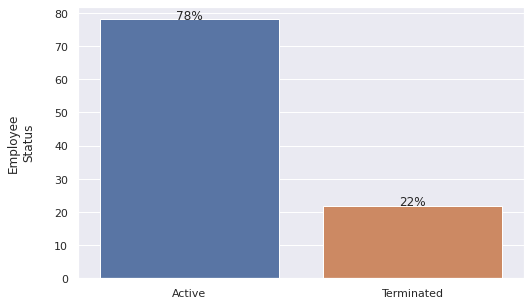

In [ ]:
fig=plt.gcf()
fig.set_size_inches(8,5)
sns.barplot((df["Employee\nStatus\n"].value_counts()/df["Employee\nStatus\n"].value_counts()).index,(df["Employee\nStatus\n"].value_counts()/df["Employee\nStatus\n"].value_counts().values.sum())*100)
for i,value in enumerate((df["Employee\nStatus\n"].value_counts()/df["Employee\nStatus\n"].value_counts()).index):
    x=i
    y=int(round(((df["Employee\nStatus\n"].value_counts()/df["Employee\nStatus\n"].value_counts().values.sum())*100).loc[value]))
    plt.text(x,y,str(y)+"%",ha="center")

#terminated emloyees

In [ ]:
df_term=df[df["Employee\nStatus\n"]=="Terminated"]

In [ ]:
df_term.head()

,Employee ID,Data Effective Date,Employee\nStatus\n,"Career Level \n(1=lowest, 6=highest)\n",Hired Date,Hired in FY\n(Yes/No),Termination Date,Terminated\nin FY\n(Yes/No),Termination Type\n(Voluntary or Involuntary Exit),Job Start Date,Promoted\nin FY\n(Yes/No),Birth Date,Age\n(Years),Tenure\n(Years),Time in\nJob (Years),"Rating\n(1=lowest, 5=highest)",Education\n(Highest\nDegree),age_cat
300,N2181,2016-12-31,Terminated,1,2016-12-07,Yes,2016-10-30,Yes,Voluntary Exit,2016-12-07,NaN,1993-04-09,23,NaN,NaN,2,BA/BS,<25
301,N2182,2016-12-31,Terminated,1,2016-04-21,Yes,2016-11-26,Yes,Voluntary Exit,2016-04-21,NaN,1996-05-15,20,NaN,NaN,2,BA/BS,<25
302,N2183,2016-12-31,Terminated,1,2015-06-10,Yes,2016-12-05,Yes,Voluntary Exit,2015-06-10,NaN,1992-09-22,24,NaN,NaN,2,MBA,<25
303,N2184,2016-12-31,Terminated,1,2015-04-25,Yes,2016-11-02,Yes,Voluntary Exit,2015-04-25,NaN,1993-02-09,23,NaN,NaN,2,BA/BS,<25
304,N2185,2016-12-31,Terminated,1,2015-08-05,Yes,2016-01-19,Yes,Voluntary Exit,2015-08-05,NaN,1993-04-03,23,NaN,NaN,2,BA/BS,<25


In [ ]:
df_term["Tenure\n(Years)"]=pd.Series(((df_term["Termination Date"]-df_term["Hired Date"])/np.timedelta64(1,"Y"))).astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_term.tail()

,Employee ID,Data Effective Date,Employee\nStatus\n,"Career Level \n(1=lowest, 6=highest)\n",Hired Date,Hired in FY\n(Yes/No),Termination Date,Terminated\nin FY\n(Yes/No),Termination Type\n(Voluntary or Involuntary Exit),Job Start Date,Promoted\nin FY\n(Yes/No),Birth Date,Age\n(Years),Tenure\n(Years),Time in\nJob (Years),"Rating\n(1=lowest, 5=highest)",Education\n(Highest\nDegree),age_cat
2788,N2589,2016-12-31,Terminated,4,2004-08-09,No,2016-09-03,Yes,Voluntary Exit,2011-12-27,No,1986-04-02,30,12,NaN,2,MA/MS,25-35
2789,N2590,2016-12-31,Terminated,4,2005-09-28,No,2016-09-28,Yes,Involuntary Exit,2012-10-06,No,1984-08-29,32,11,NaN,2,BA/BS,25-35
2790,N2591,2016-12-31,Terminated,4,2006-10-06,No,2016-01-15,Yes,Involuntary Exit,2011-03-11,No,1987-08-22,29,9,NaN,2,MBA,25-35
2791,N2592,2016-12-31,Terminated,4,2006-04-20,No,2016-02-07,Yes,Involuntary Exit,2012-09-13,No,1988-07-11,28,9,NaN,2,BA/BS,25-35
2792,N2593,2016-12-31,Terminated,4,2007-07-20,No,2016-12-12,Yes,Involuntary Exit,2012-07-19,No,1983-03-07,33,9,NaN,2,BA/BS,25-35


In [ ]:
df_term["Time in\nJob (Years)"]=pd.Series(((df_term["Termination Date"]-df_term["Job Start Date"])/np.timedelta64(1,"Y"))).astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_term.tail()

,Employee ID,Data Effective Date,Employee\nStatus\n,"Career Level \n(1=lowest, 6=highest)\n",Hired Date,Hired in FY\n(Yes/No),Termination Date,Terminated\nin FY\n(Yes/No),Termination Type\n(Voluntary or Involuntary Exit),Job Start Date,Promoted\nin FY\n(Yes/No),Birth Date,Age\n(Years),Tenure\n(Years),Time in\nJob (Years),"Rating\n(1=lowest, 5=highest)",Education\n(Highest\nDegree),age_cat
2788,N2589,2016-12-31,Terminated,4,2004-08-09,No,2016-09-03,Yes,Voluntary Exit,2011-12-27,No,1986-04-02,30,12,4,2,MA/MS,25-35
2789,N2590,2016-12-31,Terminated,4,2005-09-28,No,2016-09-28,Yes,Involuntary Exit,2012-10-06,No,1984-08-29,32,11,3,2,BA/BS,25-35
2790,N2591,2016-12-31,Terminated,4,2006-10-06,No,2016-01-15,Yes,Involuntary Exit,2011-03-11,No,1987-08-22,29,9,4,2,MBA,25-35
2791,N2592,2016-12-31,Terminated,4,2006-04-20,No,2016-02-07,Yes,Involuntary Exit,2012-09-13,No,1988-07-11,28,9,3,2,BA/BS,25-35
2792,N2593,2016-12-31,Terminated,4,2007-07-20,No,2016-12-12,Yes,Involuntary Exit,2012-07-19,No,1983-03-07,33,9,4,2,BA/BS,25-35


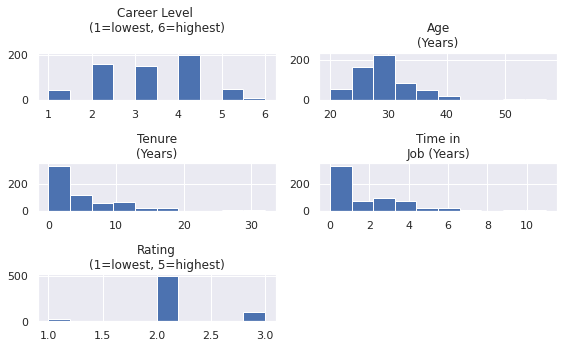

In [ ]:
df_term.hist(figsize=(8,5))
plt.tight_layout()

##1- age_cat   
##vs  
##relative no. of employees left the company

In [ ]:
df_term_series_age_cat=df["age_cat"].value_counts()
df_term_series_age_cat

25-35    1623
<25       839
35-45     246
45-55      83
55-65       2
65<         0
Name: age_cat, dtype: int64

In [ ]:
(df_term_series_age_cat/np.sum(df_term_series_age_cat.values))*100

25-35    58.109560
<25      30.039384
35-45     8.807734
45-55     2.971715
55-65     0.071608
65<       0.000000
Name: age_cat, dtype: float64

In [ ]:
df_term_series_age_cat_relative=pd.DataFrame({"pct":df_term_series_age_cat/np.sum(df_term_series_age_cat.values)*100})

In [ ]:
df_term_series_age_cat_relative

,pct
25-35,58.109560
<25,30.039384
35-45,8.807734
45-55,2.971715
55-65,0.071608
65<,0.000000


In [ ]:
df_term_series_age_cat_relative=df_term_series_age_cat_relative.reindex(["<25","25-35","35-45","45-55","55-65","65<"])
df_term_series_age_cat_relative

,pct
<25,30.039384
25-35,58.109560
35-45,8.807734
45-55,2.971715
55-65,0.071608
65<,0.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


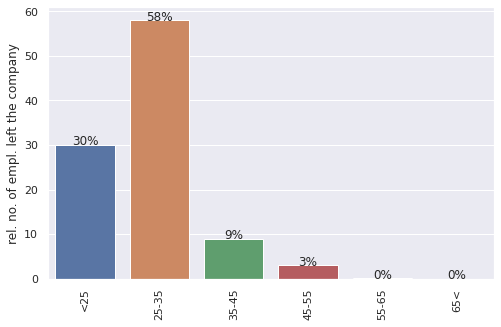

In [ ]:
fig=plt.gcf()
fig.set_size_inches(8,5)
sns.barplot(df_term_series_age_cat_relative.index,df_term_series_age_cat_relative["pct"])
plt.xticks(rotation=90)
plt.ylabel("rel. no. of empl. left the company")
for i,value in enumerate(df_term_series_age_cat_relative.index):
    x=i
    y=int(round(df_term_series_age_cat_relative.loc[value]))
    plt.text(x,y,str(y)+"%",ha="center")

##2- relative voluntary/unvoluntrary retired  
##vs  
##counts

In [ ]:
len(df_term)

613

In [ ]:
df_term["Termination Type\n(Voluntary or Involuntary Exit)"].value_counts()

Involuntary Exit    385
Voluntary Exit      228
Name: Termination Type\n(Voluntary or Involuntary Exit), dtype: int64

In [ ]:
((df_term["Termination Type\n(Voluntary or Involuntary Exit)"].value_counts()/df_term["Termination Type\n(Voluntary or Involuntary Exit)"].value_counts().values.sum())*100)

Involuntary Exit    62.805873
Voluntary Exit      37.194127
Name: Termination Type\n(Voluntary or Involuntary Exit), dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


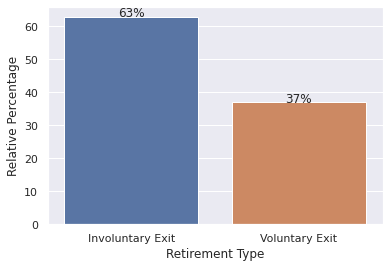

In [ ]:
sns.barplot(df_term['''Termination Type\n(Voluntary or Involuntary Exit)'''].value_counts().index,(((df_term['''Termination Type\n(Voluntary or Involuntary Exit)'''].value_counts())/df_term['''Termination Type\n(Voluntary or Involuntary Exit)'''].value_counts().values.sum())*100))
for i,value in enumerate((((df_term['''Termination Type\n(Voluntary or Involuntary Exit)'''].value_counts())/df_term['''Termination Type\n(Voluntary or Involuntary Exit)'''].value_counts().values.sum())*100).index):
    x,y=i,int(round((((df_term['''Termination Type\n(Voluntary or Involuntary Exit)'''].value_counts())/df_term['''Termination Type\n(Voluntary or Involuntary Exit)'''].value_counts().values.sum())*100).loc[value]))
    plt.text(x,y,str(y)+"%",ha="center")
    plt.xlabel("Retirement Type")
    plt.ylabel("Relative Percentage")

###report-1
here unit2 employees are happy with the company either it will be:-

1- Salary

2- Environment was so good

3- Workload wasn't too high

##3- relative rating   
##vs  
##counts


###for voluntary retired

In [ ]:
df_term_vol_exit=df_term[df_term['''Termination Type\n(Voluntary or Involuntary Exit)''']=="Voluntary Exit"]
df_term_vol_exit.head()

,Employee ID,Data Effective Date,Employee\nStatus\n,"Career Level \n(1=lowest, 6=highest)\n",Hired Date,Hired in FY\n(Yes/No),Termination Date,Terminated\nin FY\n(Yes/No),Termination Type\n(Voluntary or Involuntary Exit),Job Start Date,Promoted\nin FY\n(Yes/No),Birth Date,Age\n(Years),Tenure\n(Years),Time in\nJob (Years),"Rating\n(1=lowest, 5=highest)",Education\n(Highest\nDegree),age_cat
300,N2181,2016-12-31,Terminated,1,2016-12-07,Yes,2016-10-30,Yes,Voluntary Exit,2016-12-07,NaN,1993-04-09,23,0,0,2,BA/BS,<25
301,N2182,2016-12-31,Terminated,1,2016-04-21,Yes,2016-11-26,Yes,Voluntary Exit,2016-04-21,NaN,1996-05-15,20,0,0,2,BA/BS,<25
302,N2183,2016-12-31,Terminated,1,2015-06-10,Yes,2016-12-05,Yes,Voluntary Exit,2015-06-10,NaN,1992-09-22,24,1,1,2,MBA,<25
303,N2184,2016-12-31,Terminated,1,2015-04-25,Yes,2016-11-02,Yes,Voluntary Exit,2015-04-25,NaN,1993-02-09,23,1,1,2,BA/BS,<25
304,N2185,2016-12-31,Terminated,1,2015-08-05,Yes,2016-01-19,Yes,Voluntary Exit,2015-08-05,NaN,1993-04-03,23,0,0,2,BA/BS,<25


In [ ]:
((df_term_vol_exit["Rating\n(1=lowest, 5=highest)"].value_counts()/df_term_vol_exit["Rating\n(1=lowest, 5=highest)"].value_counts().values.sum())*100)

2    56.140351
3    43.859649
Name: Rating\n(1=lowest, 5=highest), dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


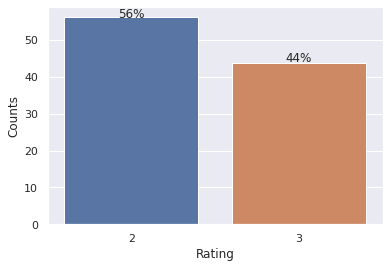

In [ ]:
sns.barplot(((df_term_vol_exit["Rating\n(1=lowest, 5=highest)"].value_counts()/df_term_vol_exit["Rating\n(1=lowest, 5=highest)"].value_counts().values.sum())*100).index,((df_term_vol_exit["Rating\n(1=lowest, 5=highest)"].value_counts()/df_term_vol_exit["Rating\n(1=lowest, 5=highest)"].value_counts().values.sum())*100).values)
for i,value in enumerate(((df_term_vol_exit["Rating\n(1=lowest, 5=highest)"].value_counts()/df_term_vol_exit["Rating\n(1=lowest, 5=highest)"].value_counts().values.sum())*100).index):
    x,y=i,int(round(((df_term_vol_exit["Rating\n(1=lowest, 5=highest)"].value_counts()/df_term_vol_exit["Rating\n(1=lowest, 5=highest)"].value_counts().values.sum())*100).loc[value]))
    plt.text(x,y,str(y)+"%",ha="center")
    plt.xlabel("Rating")
    plt.ylabel("Counts")

###report-2
here in unit1, mostly low performance employees are getting voluntary retirement.

###for involuntary retired

In [ ]:
df_term_invol_exit=df_term[df_term['''Termination Type\n(Voluntary or Involuntary Exit)''']!="Voluntary Exit"]
df_term_invol_exit.head()

,Employee ID,Data Effective Date,Employee\nStatus\n,"Career Level \n(1=lowest, 6=highest)\n",Hired Date,Hired in FY\n(Yes/No),Termination Date,Terminated\nin FY\n(Yes/No),Termination Type\n(Voluntary or Involuntary Exit),Job Start Date,Promoted\nin FY\n(Yes/No),Birth Date,Age\n(Years),Tenure\n(Years),Time in\nJob (Years),"Rating\n(1=lowest, 5=highest)",Education\n(Highest\nDegree),age_cat
309,N2190,2016-12-31,Terminated,1,2015-09-27,Yes,2016-03-28,Yes,Involuntary Exit,2015-09-27,NaN,1994-05-15,22,0,0,2,BA/BS,<25
310,N2191,2016-12-31,Terminated,1,2016-01-31,Yes,2016-08-03,Yes,Involuntary Exit,2016-01-31,NaN,1994-05-19,22,0,0,1,BA/BS,<25
311,N2192,2016-12-31,Terminated,1,2015-12-25,Yes,2016-12-24,Yes,Involuntary Exit,2015-12-25,NaN,1993-05-11,23,0,0,2,BA/BS,<25
312,N2193,2016-12-31,Terminated,1,2016-03-16,Yes,2016-05-28,Yes,Involuntary Exit,2016-03-16,NaN,1995-04-20,21,0,0,2,BA/BS,<25
313,N2194,2016-12-31,Terminated,1,2016-05-18,Yes,2016-07-30,Yes,Involuntary Exit,2016-05-18,NaN,1993-01-08,23,0,0,2,BA/BS,<25


In [ ]:
((df_term_invol_exit["Rating\n(1=lowest, 5=highest)"].value_counts()/df_term_invol_exit["Rating\n(1=lowest, 5=highest)"].value_counts().values.sum())*100)

2    94.805195
1     5.194805
Name: Rating\n(1=lowest, 5=highest), dtype: float64

In [ ]:
((df_term_invol_exit["Rating\n(1=lowest, 5=highest)"].value_counts()/df_term_invol_exit["Rating\n(1=lowest, 5=highest)"].value_counts().values.sum())*100).values[::-1]

array([ 5.19480519, 94.80519481])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


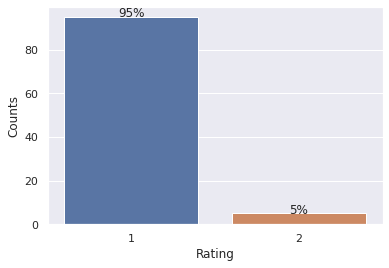

In [ ]:
sns.barplot(((df_term_invol_exit["Rating\n(1=lowest, 5=highest)"].value_counts()/df_term_invol_exit["Rating\n(1=lowest, 5=highest)"].value_counts().values.sum())*100).index,((df_term_invol_exit["Rating\n(1=lowest, 5=highest)"].value_counts()/df_term_invol_exit["Rating\n(1=lowest, 5=highest)"].value_counts().values.sum())*100).values[::-1])
for i,value in enumerate(((df_term_invol_exit["Rating\n(1=lowest, 5=highest)"].value_counts()/df_term_invol_exit["Rating\n(1=lowest, 5=highest)"].value_counts().values.sum())*100).index):
    x,y=i,int(round(((df_term_invol_exit["Rating\n(1=lowest, 5=highest)"].value_counts()/df_term_invol_exit["Rating\n(1=lowest, 5=highest)"].value_counts().values.sum())*100).loc[value]))
    plt.text(x,y,str(y)+"%",ha="center")
    plt.xlabel("Rating")
    plt.ylabel("Counts")

###report-3 
here in unit2, mostly low performance employees are getting Involuntary retirement.

That means they are terminating on the basis of performance and that is good.

##4- career level termination

In [ ]:
df_term["Career Level \n(1=lowest, 6=highest)\n"].value_counts()

4    200
2    158
3    150
5     50
1     45
6     10
Name: Career Level \n(1=lowest, 6=highest)\n, dtype: int64

In [ ]:
(df_term["Career Level \n(1=lowest, 6=highest)\n"].value_counts()/df_term["Career Level \n(1=lowest, 6=highest)\n"].value_counts().values.sum())*100

4    32.626427
2    25.774878
3    24.469821
5     8.156607
1     7.340946
6     1.631321
Name: Career Level \n(1=lowest, 6=highest)\n, dtype: float64

In [ ]:
df_term_carrlevel=pd.DataFrame({"pct":(df_term["Career Level \n(1=lowest, 6=highest)\n"].value_counts()/df_term["Career Level \n(1=lowest, 6=highest)\n"].value_counts().values.sum())*100})

In [ ]:
df_term_carrlevel=df_term_carrlevel.sort_index()
df_term_carrlevel

,pct
1,7.340946
2,25.774878
3,24.469821
4,32.626427
5,8.156607
6,1.631321


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Counts')

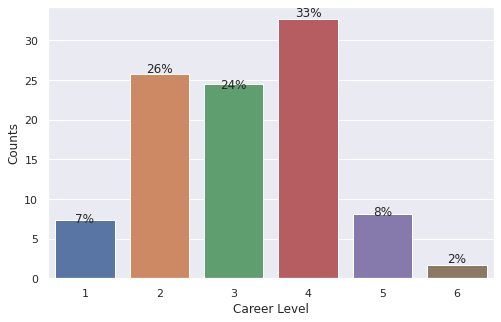

In [ ]:
fig=plt.gcf()
fig.set_size_inches(8,5)
sns.barplot(df_term_carrlevel.index,df_term_carrlevel["pct"])
for i,value in enumerate(df_term_carrlevel.index):
    x=i
    y=int(round(df_term_carrlevel.loc[value]))
    plt.text(x,y,str(y)+"%",ha="center")
plt.xlabel("Career Level")
plt.ylabel("Counts")

###report-4 
here in unit2 company is terminating mostly the low performance employees......as they are not biased to the senior levels....even senior level employees coming in the (4<career level<6) are getting the termination

#active employees

In [ ]:
df_active=df[(df["Termination Date"].isnull())]
df_active.head()

,Employee ID,Data Effective Date,Employee\nStatus\n,"Career Level \n(1=lowest, 6=highest)\n",Hired Date,Hired in FY\n(Yes/No),Termination Date,Terminated\nin FY\n(Yes/No),Termination Type\n(Voluntary or Involuntary Exit),Job Start Date,Promoted\nin FY\n(Yes/No),Birth Date,Age\n(Years),Tenure\n(Years),Time in\nJob (Years),"Rating\n(1=lowest, 5=highest)",Education\n(Highest\nDegree),age_cat
0,N0001,2016-12-31,Active,1,2016-04-19,Yes,NaT,No,NaN,2016-04-19,NaN,1995-01-09,21,NaN,NaN,3,MA/MS,<25
1,N0002,2016-12-31,Active,1,2016-10-19,Yes,NaT,No,NaN,2016-10-19,NaN,1994-09-13,22,NaN,NaN,4,MA/MS,<25
2,N0003,2016-12-31,Active,1,2016-05-26,Yes,NaT,No,NaN,2016-05-26,NaN,1996-04-19,20,NaN,NaN,3,BA/BS,<25
3,N0004,2016-12-31,Active,1,2016-10-19,Yes,NaT,No,NaN,2016-10-19,NaN,1994-01-21,22,NaN,NaN,3,BA/BS,<25
4,N0005,2016-12-31,Active,1,2016-06-02,Yes,NaT,No,NaN,2016-06-02,NaN,1993-05-18,23,NaN,NaN,3,BA/BS,<25


In [ ]:
len(df_active)

2180

In [ ]:
df_active["Rating\n(1=lowest, 5=highest)"].value_counts()

4    893
5    647
3    640
Name: Rating\n(1=lowest, 5=highest), dtype: int64

In [ ]:
df_active_rating=pd.DataFrame({"pct":(df_active["Rating\n(1=lowest, 5=highest)"].value_counts()/df_active["Rating\n(1=lowest, 5=highest)"].value_counts().values.sum())*100})
df_active_rating

,pct
4,40.963303
5,29.678899
3,29.357798


In [ ]:
df_active_rating=df_active_rating.sort_index()
df_active_rating

,pct
3,29.357798
4,40.963303
5,29.678899


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


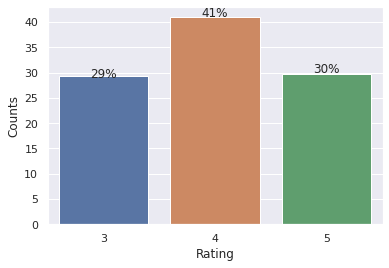

In [ ]:
sns.barplot(df_active_rating.index,df_active_rating["pct"])
for i,value in enumerate(df_active_rating.index):
    x,y=i,int(round(df_active_rating.loc[value]))
    plt.text(x,y,str(y)+"%",ha="center")
    plt.xlabel("Rating")
    plt.ylabel("Counts")

###report-5
here in unit2 there are only good performers.

In [ ]:
df_active_edu_career=df_active.groupby(["Education\n(Highest\nDegree)","Career Level \n(1=lowest, 6=highest)\n"])["Career Level \n(1=lowest, 6=highest)\n"].agg("count")
df_active_edu_career

Education\n(Highest\nDegree)  Career Level \n(1=lowest, 6=highest)\n
BA/BS                         1                                         275
                              2                                         311
                              3                                         143
                              4                                         121
                              5                                          86
                              6                                          30
JD                            3                                          22
                              4                                          14
                              5                                          12
                              6                                           2
MA/MS                         1                                          19
                              2                                         152
                   

In [ ]:
df_active_edu_career.index

MultiIndex([('BA/BS', 1),
            ('BA/BS', 2),
            ('BA/BS', 3),
            ('BA/BS', 4),
            ('BA/BS', 5),
            ('BA/BS', 6),
            (   'JD', 3),
            (   'JD', 4),
            (   'JD', 5),
            (   'JD', 6),
            ('MA/MS', 1),
            ('MA/MS', 2),
            ('MA/MS', 3),
            ('MA/MS', 4),
            ('MA/MS', 5),
            ('MA/MS', 6),
            (  'MBA', 1),
            (  'MBA', 2),
            (  'MBA', 3),
            (  'MBA', 4),
            (  'MBA', 5),
            (  'MBA', 6),
            (  'PhD', 3),
            (  'PhD', 4),
            (  'PhD', 5),
            (  'PhD', 6)],
           names=['Education\n(Highest\nDegree)', 'Career Level \n(1=lowest, 6=highest)\n'])

In [ ]:
s1,s2,s3,s4,s5=0,0,0,0,0
for i in df_active_edu_career.index:
    if (i[0]=='BA/BS' and i[1]>=4):
        s1+=df_active_edu_career.loc[i]

    elif (i[0]=='JD' and i[1]>=4):
        s2+=df_active_edu_career.loc[i]

    elif (i[0]=='MA/MS' and i[1]>=4):
        s3+=df_active_edu_career.loc[i]

    elif (i[0]=='MBA' and i[1]>=4):
        s4+=df_active_edu_career.loc[i]

    elif (i[0]=='PhD' and i[1]>=4):
        s5+=df_active_edu_career.loc[i]

print(f"BA/BS : {int(round((s1/(s1+s2+s3+s4))*100))}\nJD : {int(round((s2/(s1+s2+s3+s4))*100))}\nMA/MS : {int(round((s3/(s1+s2+s3+s4))*100))}\nMBA : {int(round((s4/(s1+s2+s3+s4))*100))}\nPhD : {int(round((s5/(s1+s2+s3+s4))*100))}")

BA/BS : 35
JD : 4
MA/MS : 30
MBA : 30
PhD : 11


In [ ]:
df_active_edu_career_dataframe=pd.DataFrame({"counts":[int(round((s1/(s1+s2+s3+s4))*100)),int(round((s2/(s1+s2+s3+s4))*100)),int(round((s3/(s1+s2+s3+s4))*100)),int(round((s4/(s1+s2+s3+s4))*100)),int(round((s5/(s1+s2+s3+s4))*100))]},index=["BA/BS","JD","MA/MS","MBA","PhD"])
df_active_edu_career_dataframe

,counts
BA/BS,35
JD,4
MA/MS,30
MBA,30
PhD,11


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Counts')

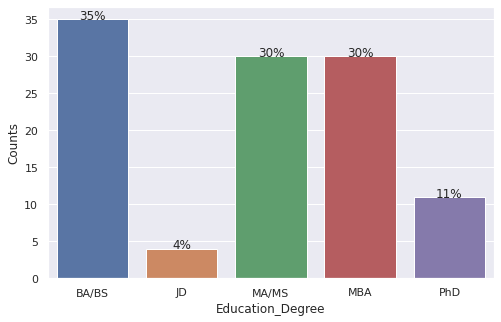

In [ ]:
fig=plt.gcf()
fig.set_size_inches(8,5)
sns.barplot(df_active_edu_career_dataframe.index,df_active_edu_career_dataframe["counts"])
for i,value in enumerate(df_active_edu_career_dataframe.index):
    x=i
    y=int(round(df_active_edu_career_dataframe.loc[value]))
    plt.text(x,y,str(y)+"%",ha="center")
plt.xlabel("Education_Degree")
plt.ylabel("Counts")

###report-6
here in unit-2, the employees at senior levels are mostly highly educated as compared to unit1.

##calculating tenure and job time

In [ ]:
(df_active["Data Effective Date"]-df_active["Hired Date"])/np.timedelta64(1,"Y")

0        0.700904
1        0.199867
2        0.599602
3        0.199867
4        0.580436
          ...    
2718    24.799962
2719    29.583085
2720    18.100303
2721    26.201770
2722    21.582921
Length: 2180, dtype: float64

In [ ]:
df_active["Tenure\n(Years)"]=(pd.Series((df_active["Data Effective Date"]-df_active["Hired Date"])/np.timedelta64(1,"Y"))).astype(int)
df_active.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Employee ID,Data Effective Date,Employee\nStatus\n,"Career Level \n(1=lowest, 6=highest)\n",Hired Date,Hired in FY\n(Yes/No),Termination Date,Terminated\nin FY\n(Yes/No),Termination Type\n(Voluntary or Involuntary Exit),Job Start Date,Promoted\nin FY\n(Yes/No),Birth Date,Age\n(Years),Tenure\n(Years),Time in\nJob (Years),"Rating\n(1=lowest, 5=highest)",Education\n(Highest\nDegree),age_cat
2718,N2176,2016-12-31,Active,6,1992-03-14,No,NaT,No,NaN,2008-01-07,No,1970-02-22,46,24,NaN,4,MBA,45-55
2719,N2177,2016-12-31,Active,6,1987-06-02,No,NaT,No,NaN,2007-08-08,No,1961-04-07,55,29,NaN,4,BA/BS,45-55
2720,N2178,2016-12-31,Active,6,1998-11-25,No,NaT,No,NaN,2008-06-02,No,1969-10-12,47,18,NaN,4,PhD,45-55
2721,N2179,2016-12-31,Active,6,1990-10-19,No,NaT,No,NaN,2007-04-20,No,1970-11-30,46,26,NaN,4,BA/BS,45-55
2722,N2180,2016-12-31,Active,6,1995-06-02,No,NaT,No,NaN,2007-09-13,No,1967-02-15,49,21,NaN,4,BA/BS,45-55


In [ ]:
df_active["Time in\nJob (Years)"]=(pd.Series((df_active["Data Effective Date"]-df_active["Job Start Date"])/np.timedelta64(1,"Y"))).astype(int)
df_active.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Employee ID,Data Effective Date,Employee\nStatus\n,"Career Level \n(1=lowest, 6=highest)\n",Hired Date,Hired in FY\n(Yes/No),Termination Date,Terminated\nin FY\n(Yes/No),Termination Type\n(Voluntary or Involuntary Exit),Job Start Date,Promoted\nin FY\n(Yes/No),Birth Date,Age\n(Years),Tenure\n(Years),Time in\nJob (Years),"Rating\n(1=lowest, 5=highest)",Education\n(Highest\nDegree),age_cat
2718,N2176,2016-12-31,Active,6,1992-03-14,No,NaT,No,NaN,2008-01-07,No,1970-02-22,46,24,8,4,MBA,45-55
2719,N2177,2016-12-31,Active,6,1987-06-02,No,NaT,No,NaN,2007-08-08,No,1961-04-07,55,29,9,4,BA/BS,45-55
2720,N2178,2016-12-31,Active,6,1998-11-25,No,NaT,No,NaN,2008-06-02,No,1969-10-12,47,18,8,4,PhD,45-55
2721,N2179,2016-12-31,Active,6,1990-10-19,No,NaT,No,NaN,2007-04-20,No,1970-11-30,46,26,9,4,BA/BS,45-55
2722,N2180,2016-12-31,Active,6,1995-06-02,No,NaT,No,NaN,2007-09-13,No,1967-02-15,49,21,9,4,BA/BS,45-55


In [ ]:
(df["Job Start Date"]-df["Hired Date"])/np.timedelta64(1,"M")

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
          ...    
2788    88.576767
2789    84.272778
2790    53.126348
2791    76.814719
2792    59.993018
Length: 2793, dtype: float64

In [ ]:
df_notice_period=pd.DataFrame({"Notice_period_gap":((df["Job Start Date"]-df["Hired Date"])/np.timedelta64(1,"M"))})
df_notice_period.tail()

,Notice_period_gap
2788,88.576767
2789,84.272778
2790,53.126348
2791,76.814719
2792,59.993018


In [ ]:
df_notice_period["Notice_period_gap"]=df_notice_period["Notice_period_gap"].astype(int)

In [ ]:
df_notice_period.tail()

,Notice_period_gap
2788,88
2789,84
2790,53
2791,76
2792,59


In [ ]:
list(range(0,13,3))+[np.inf]

[0, 3, 6, 9, 12, inf]

In [ ]:
(pd.cut(df_notice_period["Notice_period_gap"],bins=list(range(0,13,3))+[np.inf],labels=["1st 3 months","1st 6 months","1st 9 months","1st 12 months","> 1year"],include_lowest=True))

0       1st 3 months
1       1st 3 months
2       1st 3 months
3       1st 3 months
4       1st 3 months
            ...     
2788         > 1year
2789         > 1year
2790         > 1year
2791         > 1year
2792         > 1year
Name: Notice_period_gap, Length: 2793, dtype: category
Categories (5, object): ['1st 3 months' < '1st 6 months' < '1st 9 months' < '1st 12 months' < '> 1year']

In [ ]:
df_notice_period_new=pd.DataFrame({"Notice_period_gap":(pd.cut(df_notice_period["Notice_period_gap"],bins=list(range(0,13,3))+[np.inf],labels=["1st 3 months","1st 6 months","1st 9 months","1st 12 months","> 1year"],include_lowest=True))})

In [ ]:
df_notice_period_new

,Notice_period_gap
0,1st 3 months
1,1st 3 months
2,1st 3 months
3,1st 3 months
4,1st 3 months
...,...
2788,> 1year
2789,> 1year
2790,> 1year
2791,> 1year


In [ ]:
df_notice_period_new=df_notice_period_new["Notice_period_gap"].value_counts()
df_notice_period_new

> 1year          1739
1st 3 months      965
1st 12 months      36
1st 9 months       28
1st 6 months       21
Name: Notice_period_gap, dtype: int64

In [ ]:
df_notice_period_new=pd.DataFrame({"counts":df_notice_period_new})
df_notice_period_new

,counts
> 1year,1739
1st 3 months,965
1st 12 months,36
1st 9 months,28
1st 6 months,21


In [ ]:
df_notice_period_new=df_notice_period_new.reindex(["1st 3 months","1st 6 months","1st 9 months","1st 12 months","> 1year"])
df_notice_period_new

,counts
1st 3 months,965
1st 6 months,21
1st 9 months,28
1st 12 months,36
> 1year,1739


In [ ]:
(df_notice_period_new/df_notice_period_new.counts.sum())*100

,counts
1st 3 months,34.600215
1st 6 months,0.752958
1st 9 months,1.003944
1st 12 months,1.290785
> 1year,62.352098


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Counts')

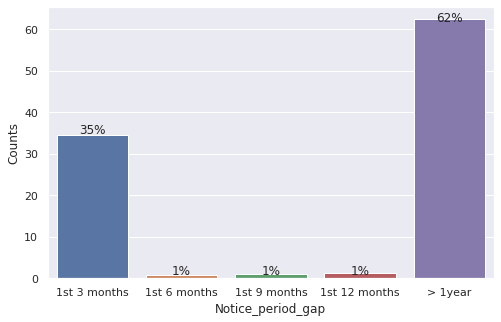

In [ ]:
fig=plt.gcf()
fig.set_size_inches(8,5)
sns.barplot(((df_notice_period_new/df_notice_period_new.counts.sum())*100).index,((df_notice_period_new/df_notice_period_new.counts.sum())*100)["counts"])
for i,value in enumerate(((df_notice_period_new/df_notice_period_new.counts.sum())*100).index):
    x=i
    y=int(round(((df_notice_period_new/df_notice_period_new.counts.sum())*100).loc[value]))
    plt.text(x,y,str(y)+"%",ha="center")
plt.xlabel("Notice_period_gap")
plt.ylabel("Counts")

###report-7
here in unit2, almost 62% of the employees join the company after 1 year of notice and 35% of employees join in the 1st 3 months and some in the other months as well, which is pretty good as compared to unit1.

This is not a good thing for a good company as it's process taking too much of time for the recruitment.